<img src='Cover Photo/Click.jpg' style='height:200px'/>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Duplicate-Observations" data-toc-modified-id="Duplicate-Observations-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Duplicate Observations</a></span></li><li><span><a href="#Missing-Values" data-toc-modified-id="Missing-Values-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Missing Values</a></span></li></ul></li><li><span><a href="#Exploratory-Analysis" data-toc-modified-id="Exploratory-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory Analysis</a></span><ul class="toc-item"><li><span><a href="#Descriptive-Statistics" data-toc-modified-id="Descriptive-Statistics-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Descriptive Statistics</a></span></li><li><span><a href="#Unique-Values" data-toc-modified-id="Unique-Values-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Unique Values</a></span></li><li><span><a href="#Correlation-Analysis" data-toc-modified-id="Correlation-Analysis-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Correlation Analysis</a></span></li><li><span><a href="#Outlier-Detection" data-toc-modified-id="Outlier-Detection-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Outlier Detection</a></span></li></ul></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#Descriptive-Analytics" data-toc-modified-id="Descriptive-Analytics-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Descriptive Analytics</a></span><ul class="toc-item"><li><span><a href="#Statistical-Analysis" data-toc-modified-id="Statistical-Analysis-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Statistical Analysis</a></span></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Feature Selection</a></span></li></ul></li><li><span><a href="#Predictive-Analytics" data-toc-modified-id="Predictive-Analytics-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Predictive Analytics</a></span><ul class="toc-item"><li><span><a href="#Model-Selection" data-toc-modified-id="Model-Selection-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Model Selection</a></span></li><li><span><a href="#Grid-Search" data-toc-modified-id="Grid-Search-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Grid Search</a></span></li><li><span><a href="#Model-Predictions" data-toc-modified-id="Model-Predictions-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Model Predictions</a></span></li></ul></li></ul></div>

In [320]:
# frequently used libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

# Data Cleaning

In [321]:
hotel_df = pd.read_csv('train_set.csv')
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396487 entries, 0 to 396486
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   hotel_id            396487 non-null  float64
 1   city_id             395979 non-null  float64
 2   content_score       395979 non-null  float64
 3   n_images            395978 non-null  float64
 4   distance_to_center  395958 non-null  float64
 5   avg_rating          286089 non-null  float64
 6   stars               395925 non-null  float64
 7   n_reviews           395958 non-null  float64
 8   avg_rank            396487 non-null  float64
 9   avg_price           396317 non-null  float64
 10  avg_saving_percent  396317 non-null  float64
 11  n_clicks            396487 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 36.3 MB


## Duplicate Observations

In [322]:
hotel_df.drop_duplicates(inplace=True)
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396487 entries, 0 to 396486
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   hotel_id            396487 non-null  float64
 1   city_id             395979 non-null  float64
 2   content_score       395979 non-null  float64
 3   n_images            395978 non-null  float64
 4   distance_to_center  395958 non-null  float64
 5   avg_rating          286089 non-null  float64
 6   stars               395925 non-null  float64
 7   n_reviews           395958 non-null  float64
 8   avg_rank            396487 non-null  float64
 9   avg_price           396317 non-null  float64
 10  avg_saving_percent  396317 non-null  float64
 11  n_clicks            396487 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 39.3 MB


## Missing Values

In [323]:
hotel_df.isna().mean()*100

hotel_id               0.000000
city_id                0.128125
content_score          0.128125
n_images               0.128377
distance_to_center     0.133422
avg_rating            27.844040
stars                  0.141745
n_reviews              0.133422
avg_rank               0.000000
avg_price              0.042877
avg_saving_percent     0.042877
n_clicks               0.000000
dtype: float64

Except for `avg_rating` other columns have less than three percent missing values, so the approach for dealing with them does not make much difference. In this project, they were replaced by median value of the corresponding column as follows:

In [324]:
except_rating_list = [ col for col in hotel_df.columns if col != 'avg_rating' ]
fill_df = hotel_df.copy()
fill_df[except_rating_list] = hotel_df[except_rating_list].fillna(hotel_df[except_rating_list].median())
fill_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396487 entries, 0 to 396486
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   hotel_id            396487 non-null  float64
 1   city_id             396487 non-null  float64
 2   content_score       396487 non-null  float64
 3   n_images            396487 non-null  float64
 4   distance_to_center  396487 non-null  float64
 5   avg_rating          286089 non-null  float64
 6   stars               396487 non-null  float64
 7   n_reviews           396487 non-null  float64
 8   avg_rank            396487 non-null  float64
 9   avg_price           396487 non-null  float64
 10  avg_saving_percent  396487 non-null  float64
 11  n_clicks            396487 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 39.3 MB


Missing values `avg_rating` is assumed not to be completely at random because the column distribution shows that most of the rating are accumulated on high values and therefore it is likely that low-rating hotels have not reported, so it was decided to use other columns and impute the missing values by regression.

In [327]:
rating_train_df = fill_df[~fill_df['avg_rating'].isna()]
rating_train_df

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks
0,9.767406e+10,134520.0,70.0,2.0,1199.0,77.0,4.0,861.0,17.550,81.64,18.0,0
1,9.768889e+10,133876.0,67.0,3.0,12585.0,90.0,4.0,4371.0,17.383,189.38,28.0,4
2,9.811544e+10,133732.0,39.0,3.0,23491.0,83.0,3.0,1005.0,16.438,57.63,27.0,44
3,9.824279e+10,43772.0,59.0,8.0,3291.0,73.0,2.0,3084.0,7.000,72.16,2.0,4
4,9.833438e+10,50532.0,66.0,1.0,288.0,80.0,0.0,603.0,12.564,173.25,0.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...
396461,2.278067e+11,54436.0,50.0,1.0,518.0,86.0,0.0,84.0,13.450,87.92,0.0,4
396462,2.280069e+11,273602.0,46.0,0.0,11555.0,81.0,0.0,102.0,6.500,27.18,0.0,0
396464,2.282555e+11,30222.0,55.0,0.0,611.0,81.0,0.0,174.0,15.966,48.46,32.0,2
396470,2.289822e+11,27338.0,42.0,0.0,689.0,83.0,0.0,72.0,14.174,116.56,4.0,0


In [328]:
rating_test_df = fill_df[fill_df['avg_rating'].isna()]
rating_test_df

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks
9,9.902959e+10,208612.0,48.0,1.0,1795.0,NaN,0.0,0.0,19.000,21.38,0.0,0
26,1.004976e+11,54398.0,52.0,1.0,1013.0,NaN,0.0,0.0,20.500,56.00,0.0,0
74,1.115944e+11,61992.0,45.0,0.0,144.0,NaN,0.0,0.0,19.000,82.26,0.0,0
81,1.181972e+11,56480.0,49.0,0.0,10417.0,NaN,0.0,0.0,10.500,175.80,0.0,0
93,1.191401e+11,27532.0,46.0,0.0,1321.0,NaN,0.0,0.0,13.000,60.83,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
396482,1.277185e+11,55122.0,53.0,1.0,1516.0,NaN,0.0,189.0,17.333,103.07,0.0,0
396483,6.841541e+09,55122.0,53.0,1.0,1516.0,NaN,0.0,189.0,12.000,44.00,0.0,0
396484,8.649506e+10,55122.0,53.0,1.0,1516.0,NaN,0.0,189.0,6.400,42.78,29.0,4
396485,1.293587e+11,55122.0,53.0,1.0,1516.0,NaN,0.0,189.0,18.143,96.23,36.0,4


In [329]:
# seperate target from features
X = rating_train_df[[ col for col in drop_n_images_df.columns if col != 'avg_rating' ]]
y = rating_train_df['avg_rating']

In [344]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [340]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [345]:
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(X_train, y_train)
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

0.19032503604198658
0.18944945671106928


In [348]:
# seperate target from features
X = rating_test_df[[ col for col in drop_n_images_df.columns if col != 'avg_rating' ]]
X.head()

,city_id,stars,n_reviews,avg_price,avg_saving_percent,avg_rank,n_clicks
9,208612.0,0.0,0.0,21.38,0.0,19.0,0
26,54398.0,0.0,0.0,56.00,0.0,20.5,0
74,61992.0,0.0,0.0,82.26,0.0,19.0,0
81,56480.0,0.0,0.0,175.80,0.0,10.5,0
93,27532.0,0.0,0.0,60.83,0.0,13.0,0


In [349]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [357]:
rating_array = dt.predict(X)
rating_df = pd.DataFrame(rating_array, index=rating_test_df.index, columns=['imputation'])
rating_df.head()

,imputation
9,80.367608
26,80.367608
74,80.367608
81,80.367608
93,80.367608


In [356]:
rating_df

,predictions
0,80.367608
1,80.367608
2,80.367608
3,80.367608
4,80.367608
...,...
110393,80.367608
110394,80.367608
110395,79.914318
110396,79.914318


In [354]:
rating_df.describe()

,predictions
count,110398.000000
mean,80.264075
std,0.439242
min,73.655252
25%,80.367608
50%,80.367608
75%,80.367608
max,81.839254


In [358]:
rating_test_df['avg_rating'] = rating_df
rating_test_df

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks
9,9.902959e+10,208612.0,48.0,1.0,1795.0,80.367608,0.0,0.0,19.000,21.38,0.0,0
26,1.004976e+11,54398.0,52.0,1.0,1013.0,80.367608,0.0,0.0,20.500,56.00,0.0,0
74,1.115944e+11,61992.0,45.0,0.0,144.0,80.367608,0.0,0.0,19.000,82.26,0.0,0
81,1.181972e+11,56480.0,49.0,0.0,10417.0,80.367608,0.0,0.0,10.500,175.80,0.0,0
93,1.191401e+11,27532.0,46.0,0.0,1321.0,80.367608,0.0,0.0,13.000,60.83,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
396482,1.277185e+11,55122.0,53.0,1.0,1516.0,80.367608,0.0,189.0,17.333,103.07,0.0,0
396483,6.841541e+09,55122.0,53.0,1.0,1516.0,80.367608,0.0,189.0,12.000,44.00,0.0,0
396484,8.649506e+10,55122.0,53.0,1.0,1516.0,79.914318,0.0,189.0,6.400,42.78,29.0,4
396485,1.293587e+11,55122.0,53.0,1.0,1516.0,79.914318,0.0,189.0,18.143,96.23,36.0,4


In [359]:
imputed_df = pd.concat([rating_train_df, rating_test_df])
imputed_df

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks
0,9.767406e+10,134520.0,70.0,2.0,1199.0,77.000000,4.0,861.0,17.550,81.64,18.0,0
1,9.768889e+10,133876.0,67.0,3.0,12585.0,90.000000,4.0,4371.0,17.383,189.38,28.0,4
2,9.811544e+10,133732.0,39.0,3.0,23491.0,83.000000,3.0,1005.0,16.438,57.63,27.0,44
3,9.824279e+10,43772.0,59.0,8.0,3291.0,73.000000,2.0,3084.0,7.000,72.16,2.0,4
4,9.833438e+10,50532.0,66.0,1.0,288.0,80.000000,0.0,603.0,12.564,173.25,0.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...
396482,1.277185e+11,55122.0,53.0,1.0,1516.0,80.367608,0.0,189.0,17.333,103.07,0.0,0
396483,6.841541e+09,55122.0,53.0,1.0,1516.0,80.367608,0.0,189.0,12.000,44.00,0.0,0
396484,8.649506e+10,55122.0,53.0,1.0,1516.0,79.914318,0.0,189.0,6.400,42.78,29.0,4
396485,1.293587e+11,55122.0,53.0,1.0,1516.0,79.914318,0.0,189.0,18.143,96.23,36.0,4


# Exploratory Analysis

## Descriptive Statistics

In [311]:
fill_df.describe()

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks
count,3.964870e+05,396487.000000,396487.000000,3.964870e+05,3.964870e+05,396487.000000,396487.000000,396487.000000,396487.000000,396487.000000,396487.000000,396487.000000
mean,1.326304e+11,149072.936066,50.995367,2.589896e+02,1.632404e+04,82.001740,1.158015,912.700555,14.694502,109.318464,7.176523,13.781980
std,1.033722e+11,219074.667559,11.556257,1.730570e+04,2.750368e+05,5.155463,1.619152,2431.014796,5.604578,148.168528,13.079568,123.572896
min,1.557962e+08,2.000000,7.000000,-1.000000e+00,0.000000e+00,34.000000,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000
25%,4.062255e+10,32080.000000,45.000000,0.000000e+00,5.450000e+02,80.000000,0.000000,0.000000,11.091000,51.060000,0.000000,0.000000
50%,1.087280e+11,55122.000000,53.000000,1.000000e+00,1.516000e+03,83.000000,0.000000,189.000000,15.000000,77.650000,0.000000,0.000000
75%,2.281935e+11,137456.000000,59.000000,2.000000e+00,4.158000e+03,85.000000,3.000000,777.000000,18.375000,120.910000,10.000000,2.000000
max,3.237114e+11,878736.000000,81.000000,2.393911e+06,1.834155e+07,97.000000,5.000000,283089.000000,100.000000,8000.000000,99.000000,13742.000000


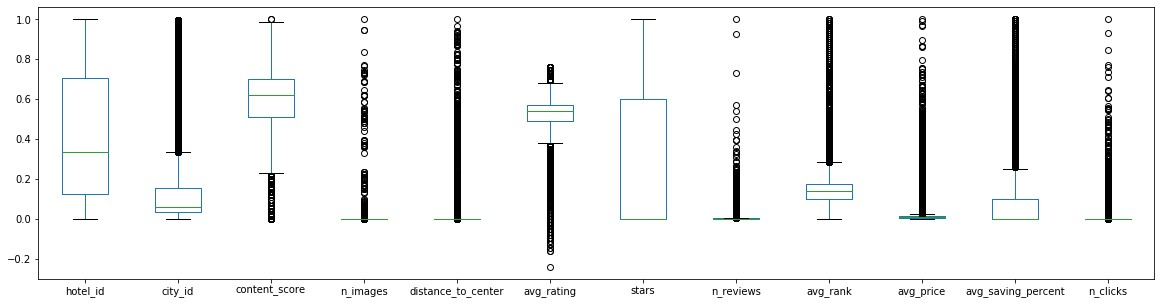

In [312]:
fill_norm_df=(fill_df-outlier_df.min())/(fill_df.max()-fill_df.min())
fill_norm_df.plot.box(figsize=(20, 5))

In [313]:
fill_df.hotel_id.max() - fill_df.hotel_id.min() 

323555587601.0

Except for `hotel_id`, `content_score`, and `stars` rest of columns are extremely skewed. 

## Unique Values

In [11]:
fill_df.nunique() 

hotel_id              396487
city_id                33213
content_score             75
n_images                 318
distance_to_center     32694
avg_rating                60
stars                      6
n_reviews               5817
avg_rank               18563
avg_price              41545
avg_saving_percent       100
n_clicks                1020
dtype: int64

There are as many unique `hotel_id` as there are data points, therefore the ids are distributed uniformly. Except for stars, rest of the columns have high number of unique numbers.

In [135]:
df.describe()

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks
count,3.965000e+03,3965.000000,3965.000000,3965.000000,3.965000e+03,3965.000000,3965.000000,3965.000000,3965.000000,3965.000000,3965.000000,3965.000000
mean,1.313326e+11,147476.213367,51.127869,76.075914,1.194524e+04,81.932156,1.153342,886.562421,14.808403,107.070260,7.028247,14.876671
std,1.036014e+11,217025.296705,11.392150,2921.719772,1.893818e+05,5.143715,1.624793,2451.422502,5.593965,124.870211,12.747755,125.093483
min,1.636779e+08,1464.000000,8.000000,-1.000000,0.000000e+00,46.000000,0.000000,0.000000,1.000000,5.060000,0.000000,0.000000
25%,4.113081e+10,32190.000000,45.000000,0.000000,5.130000e+02,80.000000,0.000000,0.000000,11.400000,51.030000,0.000000,0.000000
50%,1.001596e+11,55122.000000,53.000000,1.000000,1.458000e+03,83.000000,0.000000,186.000000,15.031000,77.650000,0.000000,0.000000
75%,2.269439e+11,137464.000000,59.000000,2.000000,3.982000e+03,84.000000,3.000000,765.000000,18.333000,120.560000,9.000000,2.000000
max,3.229750e+11,878516.000000,76.000000,152979.000000,1.052092e+07,96.000000,5.000000,92751.000000,88.000000,3418.010000,92.000000,5318.000000


## Correlation Analysis

In [12]:
fill_df.head() 

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks
0,9.767406e+10,134520.0,70.0,2.0,1199.0,77.0,4.0,861.0,17.550,81.64,18.0,0
1,9.768889e+10,133876.0,67.0,3.0,12585.0,90.0,4.0,4371.0,17.383,189.38,28.0,4
2,9.811544e+10,133732.0,39.0,3.0,23491.0,83.0,3.0,1005.0,16.438,57.63,27.0,44
3,9.824279e+10,43772.0,59.0,8.0,3291.0,73.0,2.0,3084.0,7.000,72.16,2.0,4
4,9.833438e+10,50532.0,66.0,1.0,288.0,80.0,0.0,603.0,12.564,173.25,0.0,10


In [136]:
fill_df.corr().style.background_gradient()

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks
hotel_id,1.000000,0.029609,-0.722390,-0.031906,0.049702,0.254290,-0.568394,-0.313276,0.158623,0.140305,-0.363466,-0.097081
city_id,0.029609,1.000000,-0.017870,-0.012062,-0.001644,0.027192,-0.027326,-0.079778,-0.050736,-0.045466,-0.041305,-0.050561
content_score,-0.722390,-0.017870,1.000000,0.023662,-0.120214,-0.151857,0.535458,0.289379,-0.137567,-0.077219,0.370219,0.101099
n_images,-0.031906,-0.012062,0.023662,1.000000,-0.000630,-0.013801,0.004977,0.015416,0.008833,-0.001611,0.012759,-0.002912
distance_to_center,0.049702,-0.001644,-0.120214,-0.000630,1.000000,0.011857,-0.029465,-0.015392,-0.025311,0.098771,-0.020111,-0.004613
avg_rating,0.254290,0.027192,-0.151857,-0.013801,0.011857,1.000000,-0.110077,-0.080791,0.022531,0.137445,-0.159153,0.000955
stars,-0.568394,-0.027326,0.535458,0.004977,-0.029465,-0.110077,1.000000,0.354796,-0.178362,-0.011105,0.458026,0.134577
n_reviews,-0.313276,-0.079778,0.289379,0.015416,-0.015392,-0.080791,0.354796,1.000000,-0.109999,0.003434,0.374542,0.217871
avg_rank,0.158623,-0.050736,-0.137567,0.008833,-0.025311,0.022531,-0.178362,-0.109999,1.000000,0.029208,-0.138565,-0.087292
avg_price,0.140305,-0.045466,-0.077219,-0.001611,0.098771,0.137445,-0.011105,0.003434,0.029208,1.000000,-0.040688,0.010306


`hotel_id` has relatively high correlations with other columns. This might be due to the fact that the hotel IDs are assigned one after another based on the establishment date of the hotel which affects many feature. For instance, more recent hotels might have less images because there has not been enough time for people to take pictures and post them therefore it has negative correlation with `n_images`. As an other example, new hotels tend to be more expensive because of their ameneties and therefore the positive correlation with `avg_price`.

In [152]:
fill2_df = fill_df.sample(frac=0.01, random_state=0)
fill2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3965 entries, 308607 to 310814
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hotel_id            3965 non-null   float64
 1   city_id             3965 non-null   float64
 2   content_score       3965 non-null   float64
 3   n_images            3965 non-null   float64
 4   distance_to_center  3965 non-null   float64
 5   avg_rating          3965 non-null   float64
 6   stars               3965 non-null   float64
 7   n_reviews           3965 non-null   float64
 8   avg_rank            3965 non-null   float64
 9   avg_price           3965 non-null   float64
 10  avg_saving_percent  3965 non-null   float64
 11  n_clicks            3965 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 402.7 KB


In [144]:
# seperate target from features
X = fill2_df[fill2_df.columns[:-1]]
y = fill2_df[fill2_df.columns[-1]]

In [145]:
# scale data with standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(data=scaler.fit_transform(X), columns=X.columns)

## Outlier Detection 

Skewed distributions is likely to introduce bias to the prediction algorithms. The prediction problem is multi-dimentional.  Therefore, multi-dimentional outliers are detected using an unsupervised machine learning technique. 

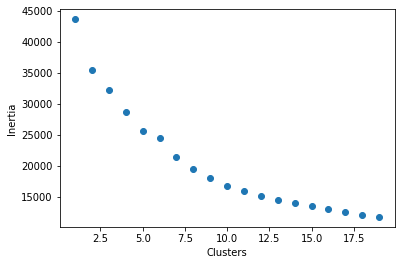

In [146]:
# elbow diagram
inertia_dict = {}
for k in range(1,20):
    km = KMeans(n_clusters=k).fit(X)
    inertia_dict[k] = km.inertia_    
plt.scatter(inertia_dict.keys(), inertia_dict.values())
plt.xlabel('Clusters')
plt.ylabel('Inertia');

In [147]:
km = KMeans(n_clusters=11).fit(X)

In [148]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

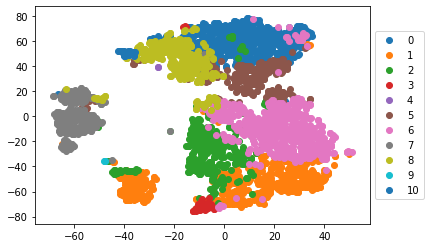

In [153]:
y = km.labels_
fig, ax = plt.subplots()

groups = pd.DataFrame(X_tsne, columns=['x', 'y']).assign(category=y).groupby('category')
for name, points in groups:
    ax.scatter(points.x, points.y, label=name);

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [154]:
fill2_df['km_labels'] = pd.Series(km.labels_, index=fill2_df.index)
fill2_df

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks,km_labels
308607,2.534251e+11,761262.0,42.0,0.0,1886.0,83.0,0.0,0.0,24.125,118.40,0.0,0,7
239823,1.705627e+09,50236.0,62.0,8.0,1862.0,72.0,4.0,5283.0,16.779,90.76,36.0,20,8
80813,1.247447e+10,30118.0,60.0,2.0,9346.0,86.0,3.0,2061.0,9.688,107.91,12.0,0,0
11461,2.531607e+11,133746.0,19.0,0.0,38336.0,83.0,0.0,0.0,11.000,19.66,0.0,0,1
159218,7.247814e+10,54238.0,52.0,2.0,597.0,79.0,3.0,555.0,14.148,72.71,0.0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
351741,2.875375e+10,17378.0,62.0,3.0,1564.0,81.0,3.0,1440.0,14.046,80.32,9.0,16,0
39368,2.073213e+11,31812.0,23.0,0.0,258105.0,83.0,0.0,0.0,21.000,18.69,3.0,0,1
17235,4.339220e+10,750162.0,61.0,1.0,286.0,76.0,3.0,1509.0,11.448,74.57,20.0,42,7
359279,2.234608e+11,54042.0,43.0,0.0,285.0,85.0,0.0,303.0,12.000,441.54,0.0,0,1


In [248]:
outlier_df = fill2_df[~fill2_df['km_labels'].isin([4])]
outlier_df.drop('km_labels', axis='columns', inplace=True)
outlier_df.info()
outlier_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3089 entries, 308607 to 359279
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hotel_id            3089 non-null   float64
 1   city_id             3089 non-null   float64
 2   content_score       3089 non-null   float64
 3   n_images            3089 non-null   float64
 4   distance_to_center  3089 non-null   float64
 5   avg_rating          3089 non-null   float64
 6   stars               3089 non-null   float64
 7   n_reviews           3089 non-null   float64
 8   avg_rank            3089 non-null   float64
 9   avg_price           3089 non-null   float64
 10  avg_saving_percent  3089 non-null   float64
 11  n_clicks            3089 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 313.7 KB


,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks
count,3.089000e+03,3089.000000,3089.000000,3.089000e+03,3.089000e+03,3089.000000,3089.000000,3089.000000,3089.000000,3089.000000,3089.000000,3089.000000
mean,1.343774e+11,170182.464228,50.505342,1.378632e+03,2.084791e+04,81.745549,1.088702,781.762706,15.859975,109.528569,4.460343,8.880544
std,1.022934e+11,240903.352195,11.813838,4.456653e+04,3.720358e+05,5.462958,1.550708,2442.877139,5.092432,148.784381,8.323359,84.224635
min,1.586311e+08,1478.000000,7.000000,-1.000000e+00,0.000000e+00,49.000000,0.000000,0.000000,1.000000,6.060000,0.000000,0.000000
25%,4.615532e+10,37294.000000,44.000000,0.000000e+00,5.190000e+02,80.000000,0.000000,0.000000,12.927000,50.460000,0.000000,0.000000
50%,1.074600e+11,63266.000000,53.000000,1.000000e+00,1.431000e+03,83.000000,0.000000,168.000000,16.000000,77.010000,0.000000,0.000000
75%,2.290350e+11,139124.000000,59.000000,2.000000e+00,4.048000e+03,84.000000,3.000000,648.000000,19.000000,119.980000,6.000000,2.000000
max,3.213934e+11,878696.000000,74.000000,2.007288e+06,1.646128e+07,95.000000,5.000000,61596.000000,85.000000,3142.470000,63.000000,3036.000000


# Feature Engineering

In [158]:
# detect wether any column has zeros
zero_test = (outlier_df == 0).any()
zero_test

hotel_id              False
city_id               False
content_score         False
n_images               True
distance_to_center     True
avg_rating            False
stars                  True
n_reviews              True
avg_rank              False
avg_price             False
avg_saving_percent     True
n_clicks               True
km_labels              True
dtype: bool

In [300]:
# transform each column with suitable transformation function 
transformation_dict = {'hotel_id': lambda x: x**1,
                       'city_id': lambda x: x**1, 
                       'content_score': lambda x: x**3,
                       'n_images': lambda x: np.log(x+2),
                       'distance_to_center': lambda x: np.log(x+1),
                       'avg_rating': lambda x: x**5,
                       'stars': lambda x: np.log(x+100),
                       'n_reviews': lambda x: np.log(x+1),
                       'avg_rank': lambda x: x**1,
                       'avg_price': lambda x: np.log(x+1),
                       'avg_saving_percent': lambda x:np.log(x+1),
                       'n_clicks': lambda x: np.log(x+1)}
transformed_df = outlier_df.transform(transformation_dict, axis='index')

In [298]:
transformed_df.describe()

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks
count,3.089000e+03,3089.000000,3089.000000,3089.000000,3089.000000,3.089000e+03,3089.000000,3089.000000,3089.000000,3089.000000,3089.000000,3089.000000
mean,1.343774e+11,170182.464228,147994.686630,1.086546,7.028132,3.798838e+09,4.615882,4.290621,15.859975,4.371148,0.841181,0.229345
std,1.022934e+11,240903.352195,76333.394939,0.671624,2.263244,1.064422e+09,0.015235,2.932900,5.092432,0.758085,1.207519,0.556852
min,1.586311e+08,1478.000000,343.000000,0.000000,0.000000,2.824752e+08,4.605170,0.000000,1.000000,1.954445,0.000000,0.000000
25%,4.615532e+10,37294.000000,85184.000000,0.693147,6.253829,3.276800e+09,4.605170,0.000000,12.927000,3.940805,0.000000,0.000000
50%,1.074600e+11,63266.000000,148877.000000,1.098612,7.266827,3.939041e+09,4.605170,5.129899,16.000000,4.356837,0.000000,0.000000
75%,2.290350e+11,139124.000000,205379.000000,1.386294,8.306225,4.182119e+09,4.634729,6.475433,19.000000,4.795625,1.945910,0.203113
max,3.213934e+11,878696.000000,405224.000000,14.512296,16.616521,7.737809e+09,4.653960,11.028368,85.000000,8.053083,4.158883,5.837354


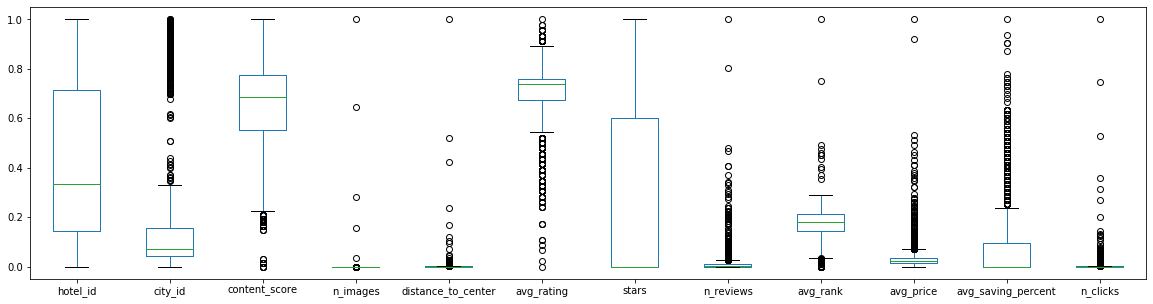

In [285]:
outlier_norm_df=(outlier_df-outlier_df.min())/(outlier_df.max()-outlier_df.min())
outlier_norm_df.plot.box(figsize=(20, 5))

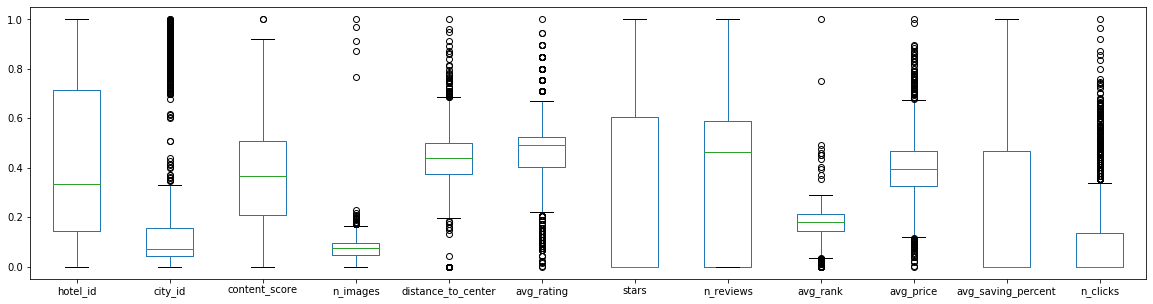

In [301]:
transformed_df=(transformed_df-transformed_df.min())/(transformed_df.max()-transformed_df.min())
transformed_df.plot.box(figsize=(20, 5));

Comparison of two distribution shows that the dataframe after transformation has less skewed distribution.

# Descriptive Analytics 

In [194]:
df = fill_df

In [195]:
from scipy import stats
corr_array=[]
for i in range(df.shape[1]-1):  
    corr_array.append([df.columns[i], 
    np.abs(stats.pearsonr(df[df.columns[i]], df[df.columns[-1]])[0]),
    stats.pearsonr(df[df.columns[i]], df[df.columns[-1]])[0],
    stats.pearsonr(df[df.columns[i]], df[df.columns[-1]])[1]])
    
corr_df = pd.DataFrame(corr_array, columns = ['feature', 'abs_corr', 'corr', 'p_value'])
corr_df.sort_values(by = 'abs_corr', ascending = False, inplace = True)
corr_df.reset_index(drop = True, inplace = True)
corr_df

,feature,abs_corr,corr,p_value
0,n_reviews,0.215484,0.215484,0.000000e+00
1,avg_saving_percent,0.133892,0.133892,0.000000e+00
2,stars,0.130785,0.130785,0.000000e+00
3,hotel_id,0.095660,-0.095660,0.000000e+00
4,content_score,0.095414,0.095414,0.000000e+00
5,avg_rank,0.081410,-0.081410,0.000000e+00
6,city_id,0.042848,-0.042848,1.824792e-160
7,avg_price,0.015341,0.015341,4.440097e-22
8,distance_to_center,0.004722,-0.004722,2.948304e-03
9,n_images,0.002911,0.002911,6.681633e-02


## Statistical Analysis

In [196]:
# seperate target from features
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [197]:
# fit OLS function and display results
import statsmodels.api as sm
X_withconstant = sm.add_constant(X)
lr = sm.OLS(y, X_withconstant).fit()
display(lr.summary().tables[1])

,coef,std err,t,P>|t|,[0.025,0.975]
const,-43.7840,3.430,-12.764,0.000,-50.507,-37.061
hotel_id,1.894e-11,2.9e-12,6.535,0.000,1.33e-11,2.46e-11
city_id,-1.369e-05,8.77e-07,-15.604,0.000,-1.54e-05,-1.2e-05
content_score,0.1030,0.025,4.197,0.000,0.055,0.151
n_images,-4.494e-06,1.1e-05,-0.408,0.683,-2.61e-05,1.71e-05
distance_to_center,5.902e-08,7e-07,0.084,0.933,-1.31e-06,1.43e-06
avg_rating,0.6372,0.039,16.401,0.000,0.561,0.713
stars,3.3918,0.156,21.699,0.000,3.085,3.698
n_reviews,0.0092,8.76e-05,104.811,0.000,0.009,0.009
avg_rank,-1.1511,0.035,-33.173,0.000,-1.219,-1.083


## Feature Selection

In [198]:
# variance inflation factors
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)
vif_series.sort_values(ascending=False, inplace=True)
vif_df = pd.DataFrame(vif_series, columns=['vif'])
vif_df

,vif
hotel_id,6.399691
content_score,1.913039
stars,1.759538
avg_saving_percent,1.414467
n_reviews,1.246369
avg_price,1.034230
distance_to_center,1.015926
city_id,1.015301
avg_rank,1.009024
n_images,1.000363


In [207]:
drop_hotel_id_df = fill_df.drop('hotel_id', axis='columns')
drop_hotel_id_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396487 entries, 0 to 396486
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   city_id             396487 non-null  float64
 1   content_score       396487 non-null  float64
 2   n_images            396487 non-null  float64
 3   distance_to_center  396487 non-null  float64
 4   avg_rating          396487 non-null  float64
 5   stars               396487 non-null  float64
 6   n_reviews           396487 non-null  float64
 7   avg_rank            396487 non-null  float64
 8   avg_price           396487 non-null  float64
 9   avg_saving_percent  396487 non-null  float64
 10  n_clicks            396487 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 36.3 MB


In [208]:
df = drop_hotel_id_df
# seperate target from features
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [204]:
# fit OLS function and display results
import statsmodels.api as sm
X_withconstant = sm.add_constant(X)
lr = sm.OLS(y, X_withconstant).fit()
display(lr.summary().tables[1])

,coef,std err,t,P>|t|,[0.025,0.975]
const,2.6034,0.264,9.862,0.000,2.086,3.121
hotel_id,-1.205e-11,4.69e-13,-25.675,0.000,-1.3e-11,-1.11e-11
city_id,6.004e-06,1.31e-07,45.935,0.000,5.75e-06,6.26e-06
content_score,0.0377,0.004,9.651,0.000,0.030,0.045
n_images,2.97e-07,6.99e-07,0.425,0.671,-1.07e-06,1.67e-06
distance_to_center,4.024e-07,8.42e-08,4.779,0.000,2.37e-07,5.67e-07
stars,-1.2688,0.025,-50.606,0.000,-1.318,-1.220
n_reviews,0.0002,1.42e-05,17.252,0.000,0.000,0.000
avg_rank,0.0314,0.007,4.821,0.000,0.019,0.044
avg_price,-6.699e-05,0.000,-0.317,0.751,-0.000,0.000


In [209]:
# variance inflation factors
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)
vif_series.sort_values(ascending=False, inplace=True)
vif_df = pd.DataFrame(vif_series, columns=['vif'])
vif_df

,vif
avg_rating,31.214282
content_score,26.991451
avg_rank,7.906205
stars,2.452763
avg_saving_percent,1.839797
avg_price,1.581930
city_id,1.484845
n_reviews,1.406659
distance_to_center,1.017490
n_images,1.000556


In [210]:
drop_avg_rating_df = drop_hotel_id_df.drop('avg_rating', axis='columns')
drop_avg_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396487 entries, 0 to 396486
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   city_id             396487 non-null  float64
 1   content_score       396487 non-null  float64
 2   n_images            396487 non-null  float64
 3   distance_to_center  396487 non-null  float64
 4   stars               396487 non-null  float64
 5   n_reviews           396487 non-null  float64
 6   avg_rank            396487 non-null  float64
 7   avg_price           396487 non-null  float64
 8   avg_saving_percent  396487 non-null  float64
 9   n_clicks            396487 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 33.3 MB


In [211]:
df = drop_avg_rating_df
# seperate target from features
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [212]:
# variance inflation factors
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)
vif_series.sort_values(ascending=False, inplace=True)
vif_df = pd.DataFrame(vif_series, columns=['vif'])
vif_df

,vif
content_score,8.952244
avg_rank,6.049197
stars,2.343951
avg_saving_percent,1.819919
avg_price,1.503156
city_id,1.448191
n_reviews,1.404712
distance_to_center,1.005958
n_images,1.000544


In [213]:
drop_content_score_df = drop_avg_rating_df.drop('content_score', axis='columns')
drop_content_score_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396487 entries, 0 to 396486
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   city_id             396487 non-null  float64
 1   n_images            396487 non-null  float64
 2   distance_to_center  396487 non-null  float64
 3   stars               396487 non-null  float64
 4   n_reviews           396487 non-null  float64
 5   avg_rank            396487 non-null  float64
 6   avg_price           396487 non-null  float64
 7   avg_saving_percent  396487 non-null  float64
 8   n_clicks            396487 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 30.2 MB


In [214]:
df = drop_content_score_df
# seperate target from features
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [215]:
# variance inflation factors
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)
vif_series.sort_values(ascending=False, inplace=True)
vif_df = pd.DataFrame(vif_series, columns=['vif'])
vif_df

,vif
avg_rank,2.081523
stars,1.923905
avg_saving_percent,1.763812
avg_price,1.467249
n_reviews,1.387540
city_id,1.374096
distance_to_center,1.003837
n_images,1.000508


In [216]:
# fit OLS function and display results
import statsmodels.api as sm
X_withconstant = sm.add_constant(X)
lr = sm.OLS(y, X_withconstant).fit()
display(lr.summary().tables[1])

,coef,std err,t,P>|t|,[0.025,0.975]
const,16.3473,0.625,26.155,0.000,15.122,17.572
city_id,-1.304e-05,8.77e-07,-14.867,0.000,-1.48e-05,-1.13e-05
n_images,-4.773e-06,1.1e-05,-0.433,0.665,-2.64e-05,1.68e-05
distance_to_center,-1.637e-07,6.94e-07,-0.236,0.814,-1.52e-06,1.2e-06
stars,3.0644,0.137,22.323,0.000,2.795,3.333
n_reviews,0.0091,8.68e-05,104.634,0.000,0.009,0.009
avg_rank,-1.1445,0.035,-33.045,0.000,-1.212,-1.077
avg_price,0.0142,0.001,11.014,0.000,0.012,0.017
avg_saving_percent,0.3912,0.017,22.892,0.000,0.358,0.425


In [217]:
drop_avg_rank_df = drop_content_score_df.drop('avg_rank', axis='columns')
drop_avg_rank_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396487 entries, 0 to 396486
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   city_id             396487 non-null  float64
 1   n_images            396487 non-null  float64
 2   distance_to_center  396487 non-null  float64
 3   stars               396487 non-null  float64
 4   n_reviews           396487 non-null  float64
 5   avg_price           396487 non-null  float64
 6   avg_saving_percent  396487 non-null  float64
 7   n_clicks            396487 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 27.2 MB


In [220]:
df = drop_avg_rank_df
# seperate target from features
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [221]:
# fit OLS function and display results
import statsmodels.api as sm
X_withconstant = sm.add_constant(X)
lr = sm.OLS(y, X_withconstant).fit()
display(lr.summary().tables[1])

,coef,std err,t,P>|t|,[0.025,0.975]
const,-1.4747,0.316,-4.662,0.000,-2.095,-0.855
city_id,-1.182e-05,8.77e-07,-13.469,0.000,-1.35e-05,-1.01e-05
n_images,-4.705e-06,1.1e-05,-0.426,0.670,-2.63e-05,1.69e-05
distance_to_center,-3.066e-08,6.95e-07,-0.044,0.965,-1.39e-06,1.33e-06
stars,3.5885,0.137,26.281,0.000,3.321,3.856
n_reviews,0.0092,8.68e-05,106.005,0.000,0.009,0.009
avg_price,0.0137,0.001,10.623,0.000,0.011,0.016
avg_saving_percent,0.4128,0.017,24.137,0.000,0.379,0.446


In [222]:
# variance inflation factors
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)
vif_series.sort_values(ascending=False, inplace=True)
vif_df = pd.DataFrame(vif_series, columns=['vif'])
vif_df

,vif
stars,1.844507
avg_saving_percent,1.741064
n_reviews,1.384723
avg_price,1.195937
city_id,1.159406
distance_to_center,1.002999
n_images,1.000488


In [223]:
drop_distance_to_center_df = drop_avg_rank_df.drop('distance_to_center', axis='columns')
drop_distance_to_center_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396487 entries, 0 to 396486
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   city_id             396487 non-null  float64
 1   n_images            396487 non-null  float64
 2   stars               396487 non-null  float64
 3   n_reviews           396487 non-null  float64
 4   avg_price           396487 non-null  float64
 5   avg_saving_percent  396487 non-null  float64
 6   n_clicks            396487 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 24.2 MB


In [224]:
df = drop_distance_to_center_df
# seperate target from features
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [225]:
# fit OLS function and display results
import statsmodels.api as sm
X_withconstant = sm.add_constant(X)
lr = sm.OLS(y, X_withconstant).fit()
display(lr.summary().tables[1])

,coef,std err,t,P>|t|,[0.025,0.975]
const,-1.4752,0.316,-4.667,0.000,-2.095,-0.856
city_id,-1.182e-05,8.77e-07,-13.471,0.000,-1.35e-05,-1.01e-05
n_images,-4.705e-06,1.1e-05,-0.426,0.670,-2.63e-05,1.69e-05
stars,3.5886,0.137,26.285,0.000,3.321,3.856
n_reviews,0.0092,8.68e-05,106.007,0.000,0.009,0.009
avg_price,0.0137,0.001,10.623,0.000,0.011,0.016
avg_saving_percent,0.4128,0.017,24.137,0.000,0.379,0.446


In [226]:
drop_n_images_df = drop_distance_to_center_df.drop('n_images', axis='columns')
drop_n_images_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396487 entries, 0 to 396486
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   city_id             396487 non-null  float64
 1   stars               396487 non-null  float64
 2   n_reviews           396487 non-null  float64
 3   avg_price           396487 non-null  float64
 4   avg_saving_percent  396487 non-null  float64
 5   n_clicks            396487 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 21.2 MB


In [227]:
df = drop_n_images_df
# seperate target from features
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [228]:
# fit OLS function and display results
import statsmodels.api as sm
X_withconstant = sm.add_constant(X)
lr = sm.OLS(y, X_withconstant).fit()
display(lr.summary().tables[1])

,coef,std err,t,P>|t|,[0.025,0.975]
const,-1.4759,0.316,-4.669,0.000,-2.095,-0.856
city_id,-1.182e-05,8.77e-07,-13.470,0.000,-1.35e-05,-1.01e-05
stars,3.5882,0.137,26.283,0.000,3.321,3.856
n_reviews,0.0092,8.68e-05,106.011,0.000,0.009,0.009
avg_price,0.0137,0.001,10.623,0.000,0.011,0.016
avg_saving_percent,0.4128,0.017,24.139,0.000,0.379,0.446


In [238]:
drop_n_images_df['avg_rank'] = fill_df['avg_rank']
drop_n_images_df = drop_n_images_df[ [ col for col in drop_n_images_df.columns if col != 'n_clicks' ] + ['n_clicks'] ]

In [239]:
df = drop_n_images_df
# seperate target from features
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

,coef,std err,t,P>|t|,[0.025,0.975]
const,16.3430,0.625,26.155,0.000,15.118,17.568
city_id,-1.304e-05,8.77e-07,-14.871,0.000,-1.48e-05,-1.13e-05
stars,3.0646,0.137,22.328,0.000,2.796,3.334
n_reviews,0.0091,8.68e-05,104.641,0.000,0.009,0.009
avg_price,0.0142,0.001,11.013,0.000,0.012,0.017
avg_saving_percent,0.3912,0.017,22.895,0.000,0.358,0.425
avg_rank,-1.1444,0.035,-33.044,0.000,-1.212,-1.077


Dep. Variable:,n_clicks,R-squared:,0.055
Model:,OLS,Adj. R-squared:,0.055
Method:,Least Squares,F-statistic:,3829.
Date:,"Tue, 10 Nov 2020",Prob (F-statistic):,0.00
Time:,22:58:30,Log-Likelihood:,-2.4612e+06
No. Observations:,396487,AIC:,4.922e+06
Df Residuals:,396480,BIC:,4.923e+06
Df Model:,6,,
Covariance Type:,nonrobust,,


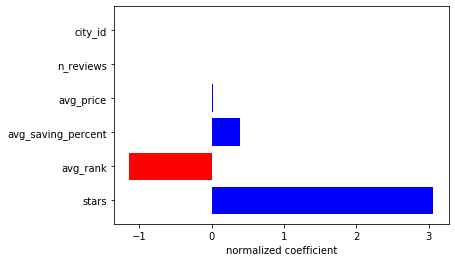

In [241]:
# fit OLS function and display results
import statsmodels.api as sm
X_withconstant = sm.add_constant(X)
lr = sm.OLS(y, X_withconstant).fit()
display(lr.summary().tables[1])
display(lr.summary().tables[0])

# table of significant coefficinets sorted by absolute value
coef_table = lr.summary().tables[1]
coef_df = pd.DataFrame(data=coef_table.data[1:], columns=coef_table.data[0])
coef_df['coef'] = coef_df['coef'].astype(float)
coef_df['P>|t|'] = coef_df['P>|t|'].astype(float)
coef_df['abs_coef'] = np.abs(coef_df['coef'])
coef_df.drop(0, axis='index', inplace=True)
coefs_by_mag = coef_df.sort_values(by='abs_coef', ascending=False)
coefs_by_mag = coefs_by_mag[coefs_by_mag['P>|t|'] <= 0.05]

# bar chart of feature coefficients
import matplotlib.pyplot as plt
plt.barh(coefs_by_mag[''], coefs_by_mag['coef'], color=np.where(coefs_by_mag['coef']>0, 'blue', 'red'))
plt.xlabel('normalized coefficient');

The insights are compatible with intution. The more stars, saving, or price a hotel has the more clicks it gets while on the other hand the further it is in the ranking the less clicks

# Predictive Analytics

In [287]:
df = transformed_df

In [288]:
# seperate target from features
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

## Model Selection 

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [290]:
model_dict = {'Nearest Neighbors': KNeighborsRegressor(n_neighbors = 10),
              'Linear Regression': SGDRegressor(alpha=0.1),
              'Decision Tree': DecisionTreeRegressor(max_depth =10),
              'Support Vectors': SVR(),
              'Random Forest': RandomForestRegressor(),
              'XG Boost': XGBRegressor(),
              'Neural Networks': MLPRegressor()}

model_df = pd.DataFrame(np.nan, index=model_dict.keys(), columns=['train score', 'test score'])
for model_name, model in model_dict.items():
    print(model_name)
    model.fit(X_train, y_train)
    model_df.loc[model_name, 'train score'] = model.score(X_train, y_train)
    model_df.loc[model_name, 'test score'] = model.score(X_test, y_test)
model_df

Nearest Neighbors
Linear Regression
Decision Tree
Support Vectors
Random Forest
XG Boost
Neural Networks


,train score,test score
Nearest Neighbors,0.338878,0.232255
Linear Regression,0.154837,0.173904
Decision Tree,0.752881,-0.052199
Support Vectors,0.090564,0.093939
Random Forest,0.883606,0.279912
XG Boost,0.976667,0.310755
Neural Networks,0.266251,0.257296


Based on the results in the table decision tree, random forest, and xg boost are selected for further optimizaiton of the hyperparameters.

## Grid Search

In [35]:
dt_pipe = Pipeline([('scaler', StandardScaler()),
                    ('regressor', DecisionTreeRegressor())])
dt_params = {'regressor__max_depth': [5, 20]}
dt_grid = GridSearchCV(dt_pipe, param_grid=lr_params)
dt_grid.fit(X_train, y_train)
print(lr_grid.score(X_train, y_train))
print(lr_grid.score(X_test, y_test))
dt_grid.best_estimator_

C:\Users\arali\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.27330718692980593
0.1925254710825397


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('regressor',
                 DecisionTreeRegressor(criterion='mse', max_depth=5,
                                       max_features=None, max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort=False, random_state=None,
                                       splitter='best'))],
         verbose=False)

In [294]:
rf_pipe = Pipeline([('scaler', StandardScaler()),
                    ('regressor', RandomForestRegressor())])

rf_params = {'regressor__n_estimators': [10, 100, 1000],
             'regressor__max_depth': [1, 10, 100, 1000],
             'regressor__max_features': [1, 2, 3]}

rf_grid = GridSearchCV(rf_pipe, param_grid=rf_params)
rf_grid.fit(X_train, y_train)
print(rf_grid.score(X_train, y_train))
print(rf_grid.score(X_test, y_test))
rf_grid.best_estimator_

0.76209941330789
0.37791765479272055


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('regressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=10, max_features=3,
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [73]:
xg_pipe = Pipeline([('scaler', StandardScaler()),
                    ('regressor', XGBRegressor())])
xg_params = {'regressor__n_estimators': [10, 100, 1000],
             'regressor__max_depth': [1, 10, 100, 1000],
             'regressor__learning_rate': [0.01, 0.1],
             'regressor__gamma': [0, 1, 10]}
xg_grid = GridSearchCV(xg_pipe, param_grid=lr_params)
xg_grid.fit(X_train, y_train)
print(xg_grid.score(X_train, y_train))
print(xg_grid.score(X_test, y_test))
xg_grid.best_estimator_

0.7681471514158036
0.39207357260955783


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('regressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=5, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=0, num_parallel_tree=1,
                              objective='reg:squarederror', random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=1, tree_method='exact',
                        

## Model Predictions

In [163]:
test_df = pd.read_csv('test_set.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132162 entries, 0 to 132161
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   hotel_id            132162 non-null  int64  
 1   city_id             132007 non-null  float64
 2   content_score       132007 non-null  float64
 3   n_images            132006 non-null  float64
 4   distance_to_center  131999 non-null  float64
 5   avg_rating          95532 non-null   float64
 6   stars               131987 non-null  float64
 7   n_reviews           131999 non-null  float64
 8   avg_rank            132162 non-null  float64
 9   avg_price           132104 non-null  float64
 10  avg_saving_percent  132104 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 11.1 MB


In [164]:
test_df.isna().mean()*100

hotel_id               0.000000
city_id                0.117280
content_score          0.117280
n_images               0.118037
distance_to_center     0.123333
avg_rating            27.715985
stars                  0.132413
n_reviews              0.123333
avg_rank               0.000000
avg_price              0.043886
avg_saving_percent     0.043886
dtype: float64

In [165]:
test_df.fillna(df.median(), inplace=True)
test_df

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent
0,14942256073,122750.0,58.0,2.0,11503.0,89.0,0.0,168.0,13.500,90.19,32.0
1,16036037903,28134.0,68.0,4.0,938.0,81.0,5.0,735.0,13.667,98.27,19.0
2,288585940112,30578.0,19.0,0.0,38982.0,83.0,0.0,0.0,20.462,48.77,0.0
3,129041645070,54398.0,47.0,0.0,1683.0,80.0,0.0,69.0,15.000,72.32,0.0
4,12460296563,63890.0,59.0,3.0,1299.0,80.0,3.0,1470.0,10.000,24.54,19.0
...,...,...,...,...,...,...,...,...,...,...,...
132157,146542092044,22896.0,47.0,0.0,3259.0,84.0,0.0,138.0,14.280,48.83,0.0
132158,191459858176,28030.0,50.0,0.0,5032.0,86.0,0.0,996.0,7.000,32.46,4.0
132159,71241988826,137926.0,62.0,0.0,1666.0,79.0,0.0,102.0,17.600,113.39,19.0
132160,204878950620,54574.0,51.0,1.0,521.0,85.0,3.0,324.0,18.925,85.63,0.0


In [166]:
test_df.describe()

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent
count,1.321620e+05,132162.000000,132162.000000,1.321620e+05,1.321620e+05,132162.000000,132162.000000,132162.000000,132162.000000,132162.000000,132162.000000
mean,1.327811e+11,149138.269714,50.953769,3.566675e+02,1.550781e+04,82.003836,1.154364,900.360262,14.714384,108.703873,7.114299
std,1.035654e+11,219487.963279,11.593146,2.094004e+04,2.493656e+05,5.157576,1.616387,2514.547873,5.658890,144.863146,12.977148
min,1.558896e+08,1354.000000,7.000000,-1.000000e+00,0.000000e+00,43.000000,0.000000,0.000000,1.000000,4.000000,0.000000
25%,4.082460e+10,32008.000000,45.000000,0.000000e+00,5.430000e+02,80.000000,0.000000,0.000000,11.043000,50.830000,0.000000
50%,1.082218e+11,55122.000000,53.000000,1.000000e+00,1.511000e+03,83.000000,0.000000,186.000000,15.000000,77.500000,0.000000
75%,2.288447e+11,137418.000000,59.000000,2.000000e+00,4.152000e+03,85.000000,3.000000,759.000000,18.429000,120.987500,9.000000
max,3.233873e+11,878696.000000,80.000000,2.628317e+06,1.603577e+07,98.000000,5.000000,254859.000000,99.000000,7938.770000,100.000000


In [167]:
test_df.nunique() 

hotel_id              132162
city_id                20903
content_score             73
n_images                 138
distance_to_center     19831
avg_rating                56
stars                      6
n_reviews               4115
avg_rank               14551
avg_price              28320
avg_saving_percent       101
dtype: int64

In [168]:
test_df.head() 

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent
0,14942256073,122750.0,58.0,2.0,11503.0,89.0,0.0,168.0,13.500,90.19,32.0
1,16036037903,28134.0,68.0,4.0,938.0,81.0,5.0,735.0,13.667,98.27,19.0
2,288585940112,30578.0,19.0,0.0,38982.0,83.0,0.0,0.0,20.462,48.77,0.0
3,129041645070,54398.0,47.0,0.0,1683.0,80.0,0.0,69.0,15.000,72.32,0.0
4,12460296563,63890.0,59.0,3.0,1299.0,80.0,3.0,1470.0,10.000,24.54,19.0


In [170]:
transformation_dict = {'hotel_id': lambda x: x**1,
                       'city_id': lambda x: x**1, 
                       'content_score': lambda x: x**3,
                       'n_images': lambda x: np.log(x+2),
                       'distance_to_center': lambda x: np.log(x+1),
                       'avg_rating': lambda x: x**5,
                       'stars': lambda x: np.log(x+100),
                       'n_reviews': lambda x: np.log(x+1),
                       'avg_rank': lambda x: x**1,
                       'avg_price': lambda x: np.log(x+1),
                       'avg_saving_percent': lambda x:np.log(x+1)}
test_trans_df = test_df.transform(transformation_dict, axis='index')

In [361]:
best_model = rf_grid.best_estimator_
n_clicks_array = best_model.predict(test_trans_df)
n_clicks_df = pd.DataFrame(n_clicks_array, columns=['predictions'])
n_clicks_df.head()

,predictions
0,0.257403
1,0.257403
2,0.092531
3,0.203334
4,0.257403


In [347]:
n_clicks_df.describe()

,predictions
count,132162.000000
mean,0.193164
std,0.064814
min,0.039410
25%,0.146369
50%,0.203334
75%,0.257403
max,0.272701


In [176]:
n_clicks_df.to_csv('predictions.csv') 